# 13wk-2: 클래스공부 4단계 – 파이썬의 비밀 (1)

최규빈  
2023-05-31

<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/03_Class/2023-05-31-13wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-wvGt0tmUiESB7Fm-eA7VYx>

# import

In [156]:
from IPython.core.display import HTML
import numpy as np
import pandas as pd

# 클래스공부 4단계: 파이썬의 비밀

## 비밀1: 자료형에 대한 비밀

***탐구***: 인스턴스의 자료형이 뭔지 탐구해보자!

`-` 아래의 클래스를 선언해보자.

In [25]:
class JungKKuckMa:
    def __init__(self):
        self.title = '파이썬 프로그래밍 중간고사 패배는 괜찮다.'
        self.imgurl = 'https://github.com/guebin/PP2023/blob/main/posts/03_Class/PP2023mid.jpg?raw=true?'
        self.ques = "Q: 파이썬 프로그래밍 기말고사, 어떤 점에 유의해야 할까?"
        self.ans = "A: 최규빈 교수 문제 스타일에 대해서 더 분석할 건 없는 것 같고, 내가 내 코드를 잘 구현하는 게 제일 중요한 것 같고 중간고사는 망하긴 했지만 제 스스로 안 무너지면 충분히 기말고사는 잘 볼 수 있을 것 같아요."
        self.highlight = '마음'
        self.html_str =\
        '''
        <style>
            .title {{
                font-family: "Times New Roman", serif;
                font-size: 30px;
                font-weight: 900;
            }}
            .text {{
                font-family: "Arial", sans-serif;
                font-size: 20px;
                font-style: italic;
            }}
            .highlight {{
                font-family: "Montserrat", monospace;
                font-size: 35px;
                font-weight: 900;
                text-decoration: underline;
                font-style: normal;
                color: darkblue;
                background-color: #FFFF00;
            }}
        </style>
        <p class="title">{ttl}</p>
        <img src={url} width="600">
        <p> \n </p>
        <p class="text">{Q}</p>
        <p class="text">{A}</p>
        <p class="title">중요한 것은 꺾이지 않는 <span class="highlight">{hl}</span></p>
        '''    
    def show(self):
        _str = self.html_str.format(
            ttl = self.title,
            url = self.imgurl,
            Q = self.ques,
            A = self.ans,
            hl = self.highlight
        )
        display(HTML(_str)) 

`-` 인스턴스를 생성해보자.

In [26]:
pp2023 = JungKKuckMa()

In [27]:
pp2023.show()

`-` 타입을 알아보자.

In [29]:
pp2023?

`-` ??? 타입은 자료형, 즉 `int`, `float`, `list` 이런것 아니었나??

In [30]:
a=[1,2,3]
a?

`-` 그런데 지금 pp2023의 자료형은 JungKKuckMa 이다.

-   가설1: 사실 파이썬 내부에 JungKKuckMa 이라는 자료형이 있었다. 그런데
    내가 만든 pp2023 이라는 인스턴스는 우연히 그 자료형을 따르는 것!
    (이건 너무 억지스럽다)
-   가설2: 사실 “인스턴스의 자료형 = 인스턴스를 찍어낸 클래스 이름”
    이다. 따라서 pp2023의 자료형이 JungKKuckMa 가 된다. 그렇다면
    자료형이 list인것은 사실 list라는 클래스에서 생긴 인스턴스라고
    유추할 수 있다 -\> 리스트자료형을 찍어낼 수 있는 어떠한 클래스가
    파이썬에 내부적으로 존재할 것이다. (이게 맞는것 같다)

***깨달음1***

`-` 가설2가 맞다? 그렇다면 아래는 모두 어딘가에서 찍혀진 인스턴스이다.

In [59]:
a=[1,2,3]
a?

In [60]:
a=1,2,3
a?

In [61]:
a=1
a?

In [62]:
a='1'
a?

`-` 그리고 위의 `a=[1,2,3]`과 같은 것들은 모두 “클래스-\>인스턴스”에
해당하는 과정이었음

***깨달음2***

`-` 생각해보니까 아래와 같이 list를 선언하는 방식도 있었음

In [63]:
a=list()
a

-   이거 지금 생각하니까 list라는 이름의 클래스에서 a라는 인스턴스를
    찍어내는 문법이다?!

`-` 아래도 가능함

In [70]:
a=list((1,2,3))
a?

-   이것도 지금 보니까 list라는 이름의 클래스에서 a라는 인스턴스를
    찍어내는 문법이다. 여기에서 (1,2,3)은 `__init__()`의 입력이다.

***깨달음3***

`-` 그러고보니까 각 자료형마다 특수한 기능들이 있었음

In [74]:
a=[1,2,3] 

`-` `a.`+tab 을 하면 append, clear 등등이 나온다.

`-` 이러한 기능은 지금까지 우리가 “list자료형 특수기능들”이라고 부르면서
사용했었다. 그런데 a가 list클래스에서 생성된 인스턴스라는 관점에서 보면
이러한 기능들은 list클래스에서 정의된 메소드라고 볼 수 있다.

> 파이썬의 비밀1: 인스턴스의 자료형은 클래스의 이름이다.

## 비밀2: `__init__`

`-` 예시1

In [107]:
a = '123'  
list(a)

`-` 예시2

In [113]:
a = list()
a.__init__('123')
a

`-` 예시3

In [112]:
a = list()
a.__init__('123') 
a.__init__() # 이런식으로 다시 리스트롤 초기화하는 것도 가능
a

> 파이썬의 비밀2: list(‘123’)은 사실 자료형을 변환하는 것이 아니라,
> ’123’을 list 클래스의 `__init__()` 입력으로 하여 “list 클래스 $\to$
> 인스턴스” 를 수행하는 코드로 해석가능하다.

## 비밀3: `__str__`

### ***motive***

`-` 아래와 같은 클래스를 관찰하자.

In [70]:
class UpJump:
    def __init__(self):
        self.reset()
    def up(self):
        self.a = self.a + 1  
        print("a의 값이 1 증가합니다.")
    def jump(self,jump_size):
        self.a = self.a + jump_size      
        print("a의 값이 {} 증가합니다.".format(jump_size))
    def show(self):
        print('a={}'.format(self.a))
    def reset(self):
        self.a = 0
        print("a의 값이 0으로 초기화 되었습니다.")

In [71]:
upjump = UpJump()

a의 값이 0으로 초기화 되었습니다.

In [72]:
upjump?

In [73]:
upjump.up()

a의 값이 1 증가합니다.

In [74]:
upjump.jump(-2)

a의 값이 -2 증가합니다.

In [75]:
upjump.show()

a=-1

In [76]:
upjump.reset()

a의 값이 0으로 초기화 되었습니다.

`-` 모티브: 생각해보니까 show와 print의 기능이 거의 비슷함 $\to$
print(upjump)를 하면 upjump.show()와 동일한 효과를 내도록 만들수 있을까?

`-` 말도 안되는 소리 같음. 왜?

-   이유1: print는 파이썬 내장기능이다. 내장기능을 우리가 마음대로
    커스터마이징해서 쓰기는 어려울 것 같다.
-   이유2: 이유1이 해결된다고 쳐도 문제이다. 그럼 지금까지 우리가 써왔던
    수많은 print()의 결과는 어떻게 되는가?

`-` 그런데 upjump의 자료형(UpJump자료형)에 해당하는 오브젝트들에
한정하여 print를 수정하는 방법이 가능하다면? (그럼 다른 오브젝트들은
수정된 print에 영향을 받지 않음)

### ***관찰1***

`-` 현재 print(upjump)의 결과는 아래와 같다.

In [78]:
print(upjump)

-   upjump는 UpJump 클래스에서 만들어진 인스턴스이며, upjump가 저장된
    메모리주소는 0x7f02a149f0a0 라는 의미

### ***관찰2***

`-` upjump 에는 `__str__()`이라는 숨겨진 메소드가 있다.

> 결국 `print(upjump)` 는 `print(upjump.__str__())` 와 같은 역할

### ***해킹?***

`-` `upjump.__str__()`의 기능을 재정의하면 `print(upjump)`의 결과도
바뀌지 않을까??

***예비학습:*** 함수 덮어씌우기 (재정의하기)

In [82]:
def f():
    print('asdf')

In [83]:
f()

asdf

In [84]:
def f():
    print('guebin hahaha')

In [85]:
f()

guebin hahaha

이런식으로 함수가 이미 정의되어 있더라도, 내가 나중에 덮어씌우면 그
함수의 기능을 다시 정의한다.

***예비학습 끝***

`-` 이제 **`.__str__()`의 기능을 재정의** 하여 보자.

In [87]:
class UpJump:
    def __init__(self):
        self.reset()
    def up(self):
        self.a = self.a + 1  
        print("a의 값이 1 증가합니다.")
    def jump(self,jump_size):
        self.a = self.a + jump_size      
        print("a의 값이 {} 증가합니다.".format(jump_size))
    def __str__(self):
        return 'a={}'.format(self.a)
    def reset(self):
        self.a = 0
        print("a의 값이 0으로 초기화 되었습니다.")

In [99]:
upjump = UpJump()

a의 값이 0으로 초기화 되었습니다.

In [102]:
upjump.__str__()

In [103]:
print(upjump.__str__())

a=0

In [104]:
print(upjump) ## 성공!

a=0

### ***지금까지의 print*** 다시 확인

`-` 예시1

In [114]:
a=[1,2,3]
print(a)

[1, 2, 3]

In [115]:
a.__str__()

In [117]:
print(a.__str__())

[1, 2, 3]

`-` 예시2

In [118]:
a={1,2,3}
print(a)

{1, 2, 3}

In [119]:
a.__str__()

In [120]:
print(a.__str__())

{1, 2, 3}

`-` 예시3

In [127]:
a= np.arange(4).reshape(2,2)
print(a)

[[0 1]
 [2 3]]

In [128]:
a.__str__()

In [129]:
print(a.__str__())

[[0 1]
 [2 3]]

> 파이썬의 비밀3: `print(a)`는 사실 `print(a.__str__())` 의
> 축약버전이었다.

***직관: 클래스에서 정의된 숨겨진 메소드 `__????__` 들이 사실 파이썬의
비밀 덩어리였음!!!***

## 비밀4: `__repr__`

### ***motive***

> repr은 representation의 약자이다.

`-` 모티브: 생각해보니까 print를 해서 우리가 원하는 정보를 확인하는건
아니었음

In [130]:
a=[1,2,3]

In [131]:
a

In [132]:
print(a)

[1, 2, 3]

`-` 의문: `a + 엔터`는 `print(a) + 엔터`와 같은 효과인가?

`-` 반례

In [133]:
a= np.arange(4).reshape(2,2)
a

In [135]:
print(a)

[[0 1]
 [2 3]]

### ***`__repr__`*** 의 역할

`-` `a + 엔터`와 `print(a) + 엔터`가 다른 경우도 있다. $\to$ 추측: 서로
다른 숨겨진 기능이 있다! $\to$ 결론: 추측이 맞다. 그 기능은 `__repr__`에
저장되어있음.

In [136]:
a.__str__()

In [138]:
a.__repr__() # 이렇게 조잡하다고? ㅋㅋㅋ

In [141]:
print(a.__str__()) # print(a) + 엔터와 같은 효과

[[0 1]
 [2 3]]

In [143]:
print(a.__repr__()) # a + 엔터와 같은 효과

array([[0, 1],
       [2, 3]])

### ***연습***

In [144]:
class UpJump:
    def __init__(self):
        self.reset()
    def up(self):
        self.a = self.a + 1  
        print("a의 값이 1 증가합니다.")
    def jump(self,jump_size):
        self.a = self.a + jump_size      
        print("a의 값이 {} 증가합니다.".format(jump_size))
    def __str__(self):
        return 'a의 값은 {}입니다.'.format(self.a)
    def reset(self):
        self.a = 0
        print("a의 값이 0으로 초기화 되었습니다.")
    def __repr__(self):
        return 'a={}'.format(self.a)
    

In [145]:
upjump = UpJump()

a의 값이 0으로 초기화 되었습니다.

In [146]:
print(upjump)

a의 값은 0입니다.

In [147]:
upjump

### ***`__repr__()` $\Rightarrow$ `__str__()`***

`-` 만약에 `__repr__()` 만 정의되었고 `__str__()`이 정의되지 않았다면
`__repr__()`의 내용이 `__str__()`의 내용을 대신한다. (하지만 역은
성립하지 않음)

In [148]:
class UpJump:
    def __init__(self):
        self.reset()
    def up(self):
        self.a = self.a + 1  
        print("a의 값이 1 증가합니다.")
    def jump(self,jump_size):
        self.a = self.a + jump_size      
        print("a의 값이 {} 증가합니다.".format(jump_size))
    # def __str__(self):
    #     return 'a의 값은 {}입니다.'.format(self.a)
    def reset(self):
        self.a = 0
        print("a의 값이 0으로 초기화 되었습니다.")
    def __repr__(self):
        return 'a={}'.format(self.a)
    

In [149]:
upjump = UpJump()

a의 값이 0으로 초기화 되었습니다.

In [150]:
print(upjump)

a=0

In [151]:
upjump

`-` 역은 성립안함! 즉 `__str__()` 만 정의되었고 `__repr__()`이 정의되지
않은경우에는 `__str__()`의 내용이 `__repr__()`의 내용을 대신할 수 없다.

In [152]:
class UpJump:
    def __init__(self):
        self.reset()
    def up(self):
        self.a = self.a + 1  
        print("a의 값이 1 증가합니다.")
    def jump(self,jump_size):
        self.a = self.a + jump_size      
        print("a의 값이 {} 증가합니다.".format(jump_size))
    def __str__(self):
        return 'a의 값은 {}입니다.'.format(self.a)
    def reset(self):
        self.a = 0
        print("a의 값이 0으로 초기화 되었습니다.")
    # def __repr__(self):
    #     return 'a={}'.format(self.a)    

In [153]:
upjump = UpJump()

a의 값이 0으로 초기화 되었습니다.

In [154]:
print(upjump)

a의 값은 0입니다.

In [155]:
upjump

> 파이썬의 비밀4: 대화형콘솔에서 `a+엔터`하여 나오는 출력결과는
> `print(a.__repr__())` 이라고 생각할 수 있다. (생각할수 있다? 아닐 수도
> 있다는 거야?)

## 비밀5: `_repr_html_`

### ***motive***

`-` 모티브: 요즘에는 IDE의 발전에 따라서 `오브젝트이름 + 엔터` 를
입력할때 나오는 출력의 형태도 다양해지고 있음.

In [158]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

-   예쁘게 나온다… 이건 근데 문자열따위로 구현할 수 있는 출력 기능이
    아닌것 같은데?

In [160]:
print(df.__repr__())

   a  b
0  1  2
1  2  3
2  3  4

In [161]:
print(df.__str__())

   a  b
0  1  2
1  2  3
2  3  4

### ***`_repr_html_`*** 의 역할

In [164]:
df._repr_html_()

In [166]:
HTML(df._repr_html_())

***참고: 그럼 `df.__repr__()`의 역할은 뭐야?***

1.  대화형콘솔중 HTML 출력을 지원하면 `오브젝트이름+엔터`는
    `HTML(df._repr_html_())` 의 효과
2.  대화형콘솔중 HTML 출력을 지원하지 않으면 `오브젝트이름+엔터`는
    `print(df.__str__())` 의 효과

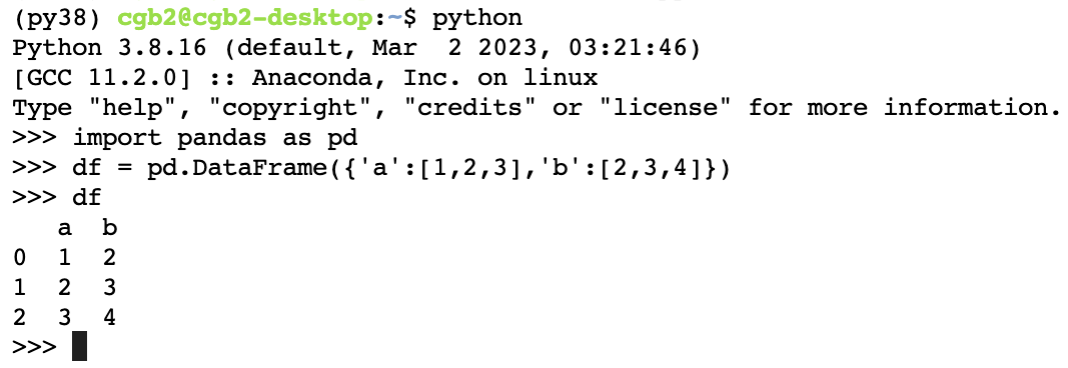

### ***`_repr_html_()` // `__repr__()` $\Rightarrow$ `__str__()`***

In [173]:
class UpJump:
    def __init__(self):
        self.reset()
    def up(self):
        self.a = self.a + 1  
        print("a의 값이 1 증가합니다.")
    def jump(self,jump_size):
        self.a = self.a + jump_size      
        print("a의 값이 {} 증가합니다.".format(jump_size))
    # def __str__(self):
    #     return 'a의 값은 {}입니다.'.format(self.a)
    def reset(self):
        self.a = 0
        print("a의 값이 0으로 초기화 되었습니다.")
    # def __repr__(self):
    #     return 'a={}'.format(self.a)    
    def _repr_html_(self):
        return 'a={}'.format(self.a)            

In [174]:
upjump = UpJump()

a의 값이 0으로 초기화 되었습니다.

In [176]:
upjump

In [178]:
print(upjump)

> 꿀팁: `__repr__()` 과 `__str__()` 을 재정의하지 않고 `_repr_html_`만을
> 재정의하여 출력결과를 바꿀 수 있다.

### ***연습***

In [184]:
class JungKKuckMa:
    def __init__(self):
        self.title = '파이썬 프로그래밍 중간고사 패배는 괜찮다.'
        self.imgurl = 'https://github.com/guebin/PP2023/blob/main/posts/03_Class/PP2023mid.jpg?raw=true?'
        self.ques = "Q: 파이썬 프로그래밍 기말고사, 어떤 점에 유의해야 할까?"
        self.ans = "A: 최규빈 교수 문제 스타일에 대해서 더 분석할 건 없는 것 같고, 내가 내 코드를 잘 구현하는 게 제일 중요한 것 같고 중간고사는 망하긴 했지만 제 스스로 안 무너지면 충분히 기말고사는 잘 볼 수 있을 것 같아요."
        self.highlight = '마음'
        self.html_str =\
        '''
        <style>
            .title {{
                font-family: "Times New Roman", serif;
                font-size: 30px;
                font-weight: 900;
            }}
            .text {{
                font-family: "Arial", sans-serif;
                font-size: 20px;
                font-style: italic;
            }}
            .highlight {{
                font-family: "Montserrat", monospace;
                font-size: 35px;
                font-weight: 900;
                text-decoration: underline;
                font-style: normal;
                color: darkblue;
                background-color: #FFFF00;
            }}
        </style>
        <p class="title">{ttl}</p>
        <img src={url} width="600">
        <p> \n </p>
        <p class="text">{Q}</p>
        <p class="text">{A}</p>
        <p class="title">중요한 것은 꺾이지 않는 <span class="highlight">{hl}</span></p>
        '''    
    def _repr_html_(self):
        _str = self.html_str.format(
            ttl = self.title,
            url = self.imgurl,
            Q = self.ques,
            A = self.ans,
            hl = self.highlight
        )
        return _str

In [185]:
a = JungKKuckMa()

In [186]:
a

> 파이썬의 비밀5: 대화형콘솔에서 `a+엔터`하여 나오는 출력결과는
> `print(a.__repr__())` 혹은 `HTML(a._repr_html_())` 이다.

# 숙제

`1`. Student 클래스를 생성지침 및 사용예시를 참고하여 설계하라.

**`생성지침`**

**attributes**

-   `name`: 이름을 저장하는 변수
-   `age`: 나이를 저장하는 변수
-   `semester`: 학기를 저장하는 변수

**methods**

-   `__init__`: name, age, semester 세 가지 매개변수를 입력받아
    인스턴스의 attribute로 저장
-   `__str__`: 인스턴스의 정보(이름,나이,학기)를 문자열 형태로 반환

**`사용예시`**

In [224]:
# 사용 예시
boram = Student(name='김보람', age=20, semester=1)
print(boram)

이름: 김보람
나이: 20
학기: 1

`2`. RPS 클래스를 생성지침 및 사용예시를 참고하여 설계하라.

**`생성지침`**

**속성**

-   `candidate` (리스트): 사용 가능한 선택지인 ‘가위’, ‘바위’, ’보’로
    이루어진 리스트
-   `actions` (리스트): 선택한 동작을 기록하는 리스트

**메서드**

-   `__init__`: 클래스의 생성자로, candidate 매개변수를 입력으로 받아
    인스턴스의 속성으로 저장한다. 그리고 actions를 빈 리스트로
    초기화한다.
-   `pick`: candidate에서 무작위로 하나의 선택지를 고르고, actions에
    선택한 동작을 기록한다.
-   `_repr_html_(self)`: 클래스의 정보를 HTML 형식의 문자열로 반환한다.
    반환된 문자열에는 candidate와 actions의 내용이 포함되어야 한다.

**클래스 설명**: RPS 클래스는 가위, 바위, 보 중 하나를 선택하고, 선택한
동작을 기록하는 클래스이다. 사용 가능한 선택지는 candidate 속성에
저장되고, 선택한 동작은 actions에 기록된다. 클래스의 정보는 HTML 형식의
문자열로 표현되며, 낼 수 있는 패(candidate)와 기록된 동작(actions)이
포함된다.

**`사용예시`**

**예시1: 인스턴스의 생성**

In [237]:
a = RPS(['가위','바위','보'])

**예시2: 인스턴스의 속성확인**

In [238]:
a.candidate, a.actions

**예시3: `_repr_html_`의 사용예시**

In [239]:
a

**예시4: `pick` method의 사용예시**

In [240]:
for i in range(5):
    a.pick()

In [241]:
a.candidate, a.actions

In [242]:
a

> **Note**
>
> **힌트**: \[‘가위’,‘바위’,‘보’\]에서 하나의 원소를 임의로 뽑는 코드의
> 구현을 위해 아래를 참고하라. ChatGPT를 활용하여 np.random.choice
> 함수의 사용방법을 익혀라.
>
> ``` python
> np.random.choice(['가위','바위','보'])
> ```

`3`. RPS클래스에서 player a와 player b를 만들어라. Player a는
\[‘가위’,‘보’\] 중에 하나를 랜덤으로 낸다. 그리고 Player b는 \[‘가위’\]
만 낸다. 누가 더 유리한가? 10회 가상대결을 해보고 누가 더 유리하게
나왔는지 판단하라.

> **Note**
>
> **힌트**: b가 절대 지는일은 없으므로 당연히 b가 유리하겠죠? 저는
> 시뮬레이션 결과가 아래와 같이 나왔습니다.
>
>     {'a승리': 0, 'b승리': 5, '무승부': 5}

`4`. RPS클래스에서 player a와 player b를 만들어라. Player a는
\[‘가위’,‘보’\] 중에 하나를 낼 수 있다. 그리고 Player b는
\[‘가위’,‘바위’\] 중 하나를 낼 수 있다. 누가 더 유리한가? 100회
가상대결을 해보고 누가 더 유리하게 나왔는지 판단하라.

> **Note**
>
> **힌트**: 시뮬레이션 결과 저는 답이 이렇게 나왔습니다.
>
>     {'a승리': 24, 'b승리': 55, '무승부': 21}
>
> 즉 정답은 “b가 더 유리하다.” 입니다. 왜 b가 유리한지 스스로
> 생각해보시기 바랍니다.